# 2014222 - Semester 2 CA-02 -May 2024

### Github account

https://github.com/2014222-student-cct-ie/2024--Semester-2--CA2/

# Part 4 - MapReduce

In [1]:
# Utilise Python programming language in order to comply with the requisites of the assessment and perform adequate Machine
# Learning algorithms to discover and deliver insights.

# Import the necessary libraries (Numpy and Pandas) in order to perform data cleansing.
# These are the libraries that are conventionally used as a common practice in order to
# perform mathematical and statistical operations during a data analysis process

import numpy as np
import pandas as pd

# Import Matplotlib and Plotly library in order to perform data visualisation procedures

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# I am using this line of code to see all columns in a wide DataFrame

pd.set_option('display.max_columns', None)

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.sql.types import FloatType


# For normalization
from pyspark.ml.feature import MinMaxScaler 
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit


# process the tweets data
# !pip install textblob
from pyspark.sql.functions import udf
from textblob import TextBlob

# pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from pyspark.sql import DataFrame

# re module provides regular expression support.
# In Python a regular expression search is typically written as:
# match = re. search(pat, str)
# The re.search() method takes a regular expression pattern and a string and searches
# for that pattern within the string.

import re

from pyspark.sql.types import StructType, StructField, IntegerType, StringType

#!pip install pyspark

#!pip install pyspark pandas

# Import the warnings module

import warnings

# Ignore all warnings by applying th the 'filterwarnings()'' function and passing the 'ignore' argument

warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
tweets_dataset_new = pd.read_csv('sentiment_score_and_labeled_tweets.csv')

In [3]:
tweets_dataset_new

tweet_ID                date_timestamp     twitter_user  \
0        1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1        1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2        1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3        1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4        1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   
...             ...                           ...              ...   
1598310  2193601966  Tue Jun 16 08:40:49 PDT 2009  AmandaMarie1028   
1598311  2193601969  Tue Jun 16 08:40:49 PDT 2009      TheWDBoards   
1598312  2193601991  Tue Jun 16 08:40:49 PDT 2009           bpbabe   
1598313  2193602064  Tue Jun 16 08:40:49 PDT 2009     tinydiamondz   
1598314  2193602129  Tue Jun 16 08:40:50 PDT 2009   RyanTrevMorris   

                                        cleaned_tweet_text  vader_score  \
0        - Awww, that's a bummer.  You shoulda got Davi...      -0.0173   
1        is upset that he can't update his Facebook by ...      -0.7500   
2        I dived many times for the ball. Managed to sa...       0.4939   
3           my whole body feels itchy and like its on fire      -0.2500   
4        no, it's not behaving at all. i'm mad. why am ...      -0.6597   
...                                                    ...          ...   
1598310  Just woke up. Having no school is the best fee...       0.5423   
1598311  TheWDB.com - Very cool to hear old Walt interv...       0.4376   
1598312  Are you ready for your MoJo Makeover? Ask me f...       0.3612   
1598313  Happy 38th Birthday to my boo of alll time!!! ...       0.6784   
1598314                                              happy       0.5719   

         textblob_score vader_sentiment textblob_sentiment  
0              0.216667        Negative           Positive  
1              0.000000        Negative            Neutral  
2              0.500000        Positive           Positive  
3              0.200000        Negative           Positive  
4             -0.625000        Negative           Negative  
...                 ...             ...                ...  
1598310        1.000000        Positive           Positive  
1598311        0.290000        Positive           Positive  
1598312        0.200000        Positive           Positive  
1598313        1.000000        Positive           Positive  
1598314        0.800000        Positive           Positive  

[1598315 rows x 8 columns]

# MapReduce 

I will show an example how MapReduce framework can be implement on sentiment_score_and_labeled_tweets dataset.

The idea is count the occurrences of each sentiment label (positive, negative, neutral) in the dataset. However, **I did face errors when I was performing MapReduce in the virtual machine.**

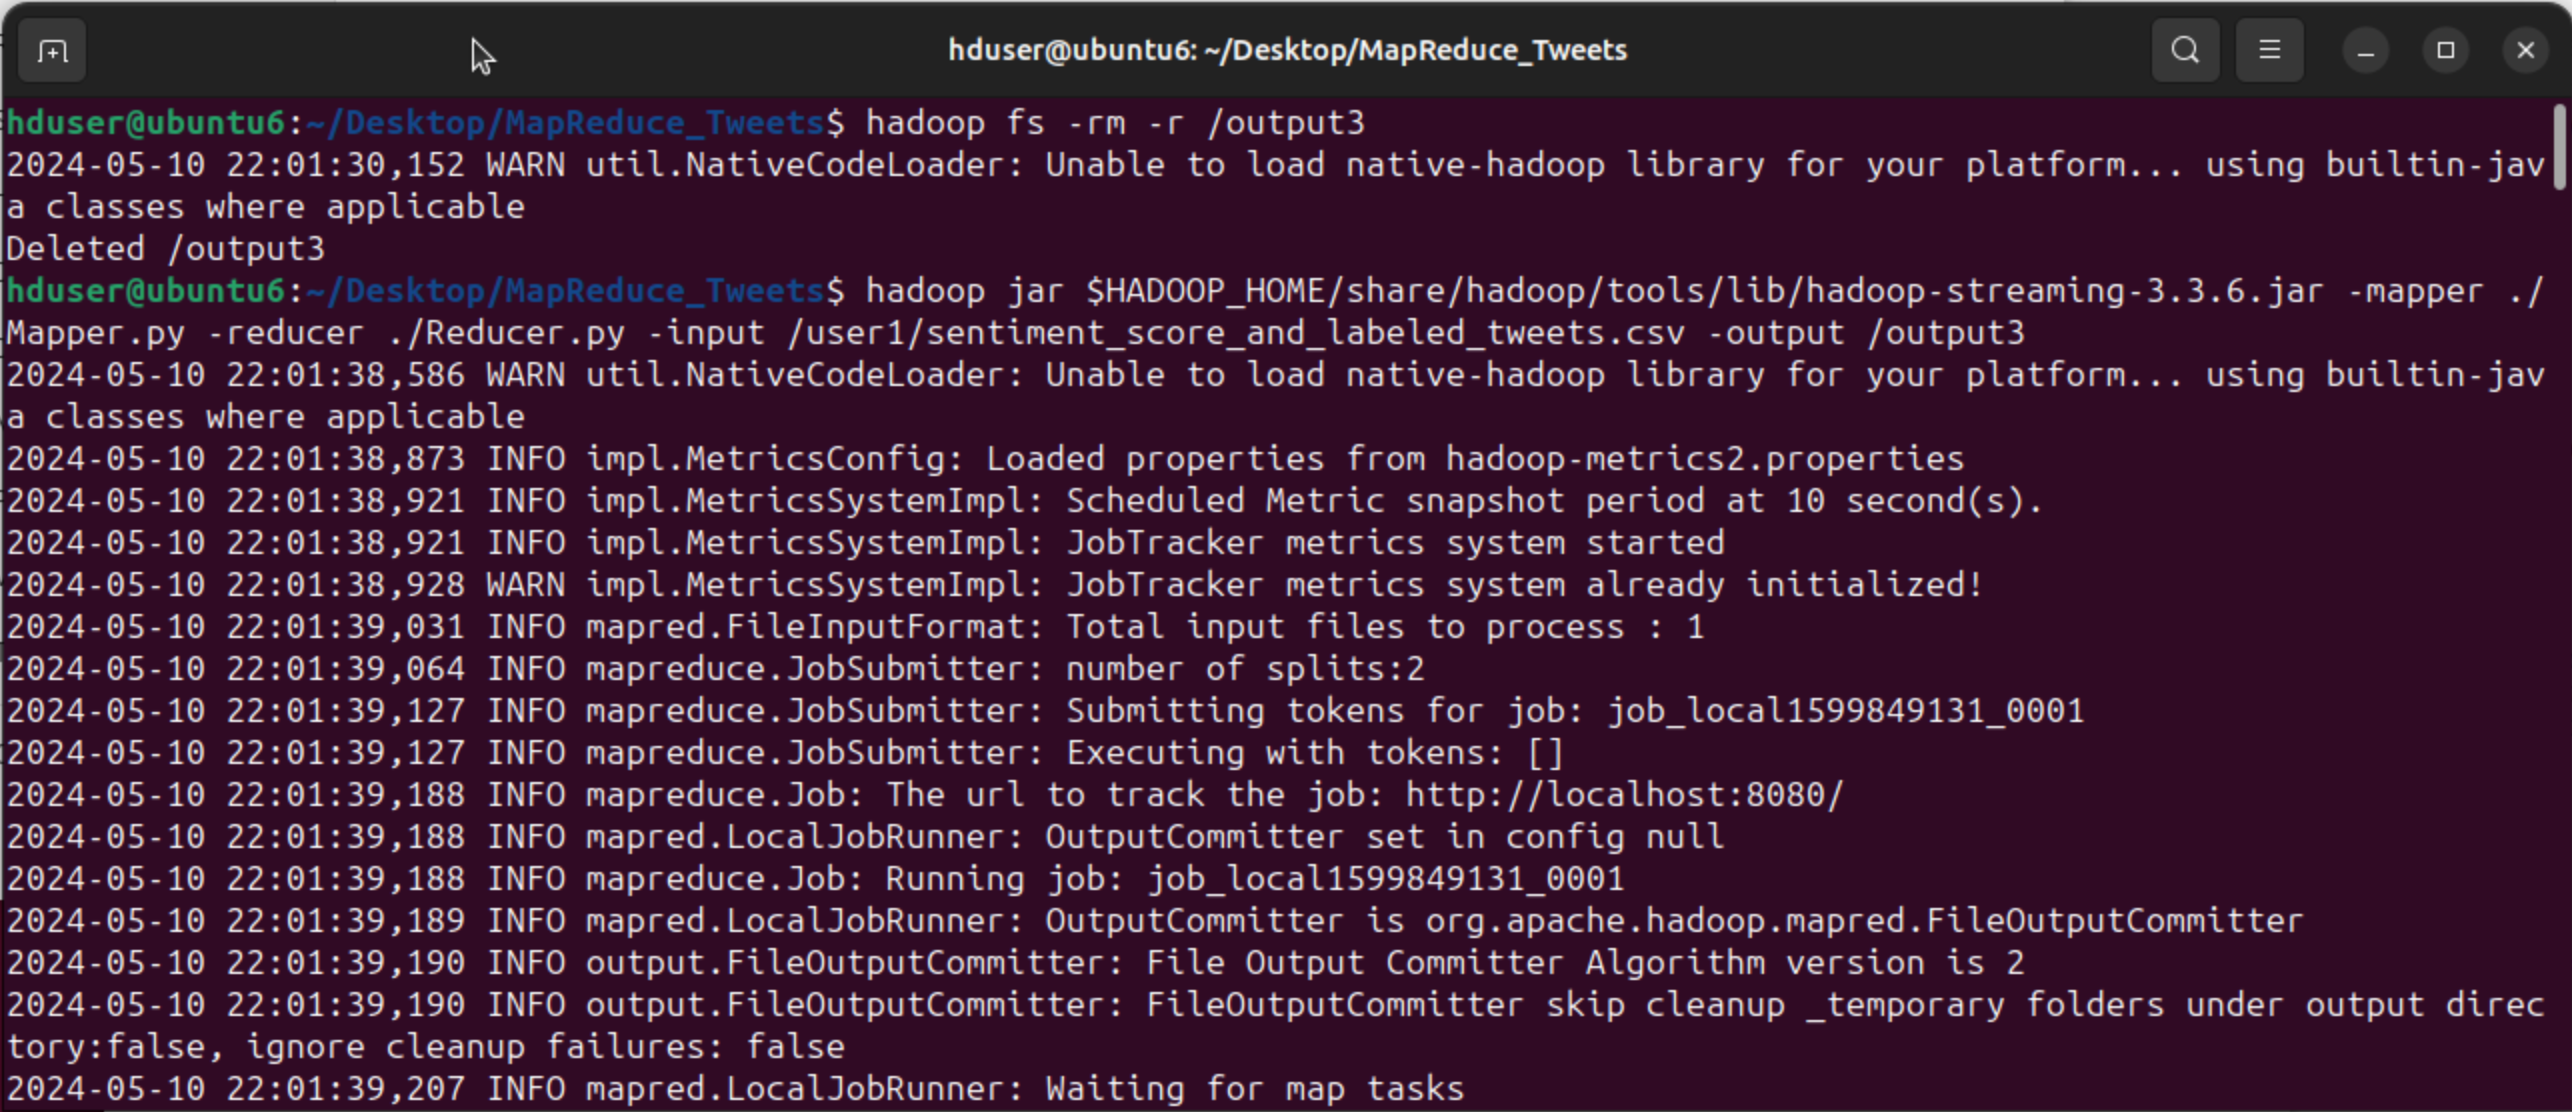

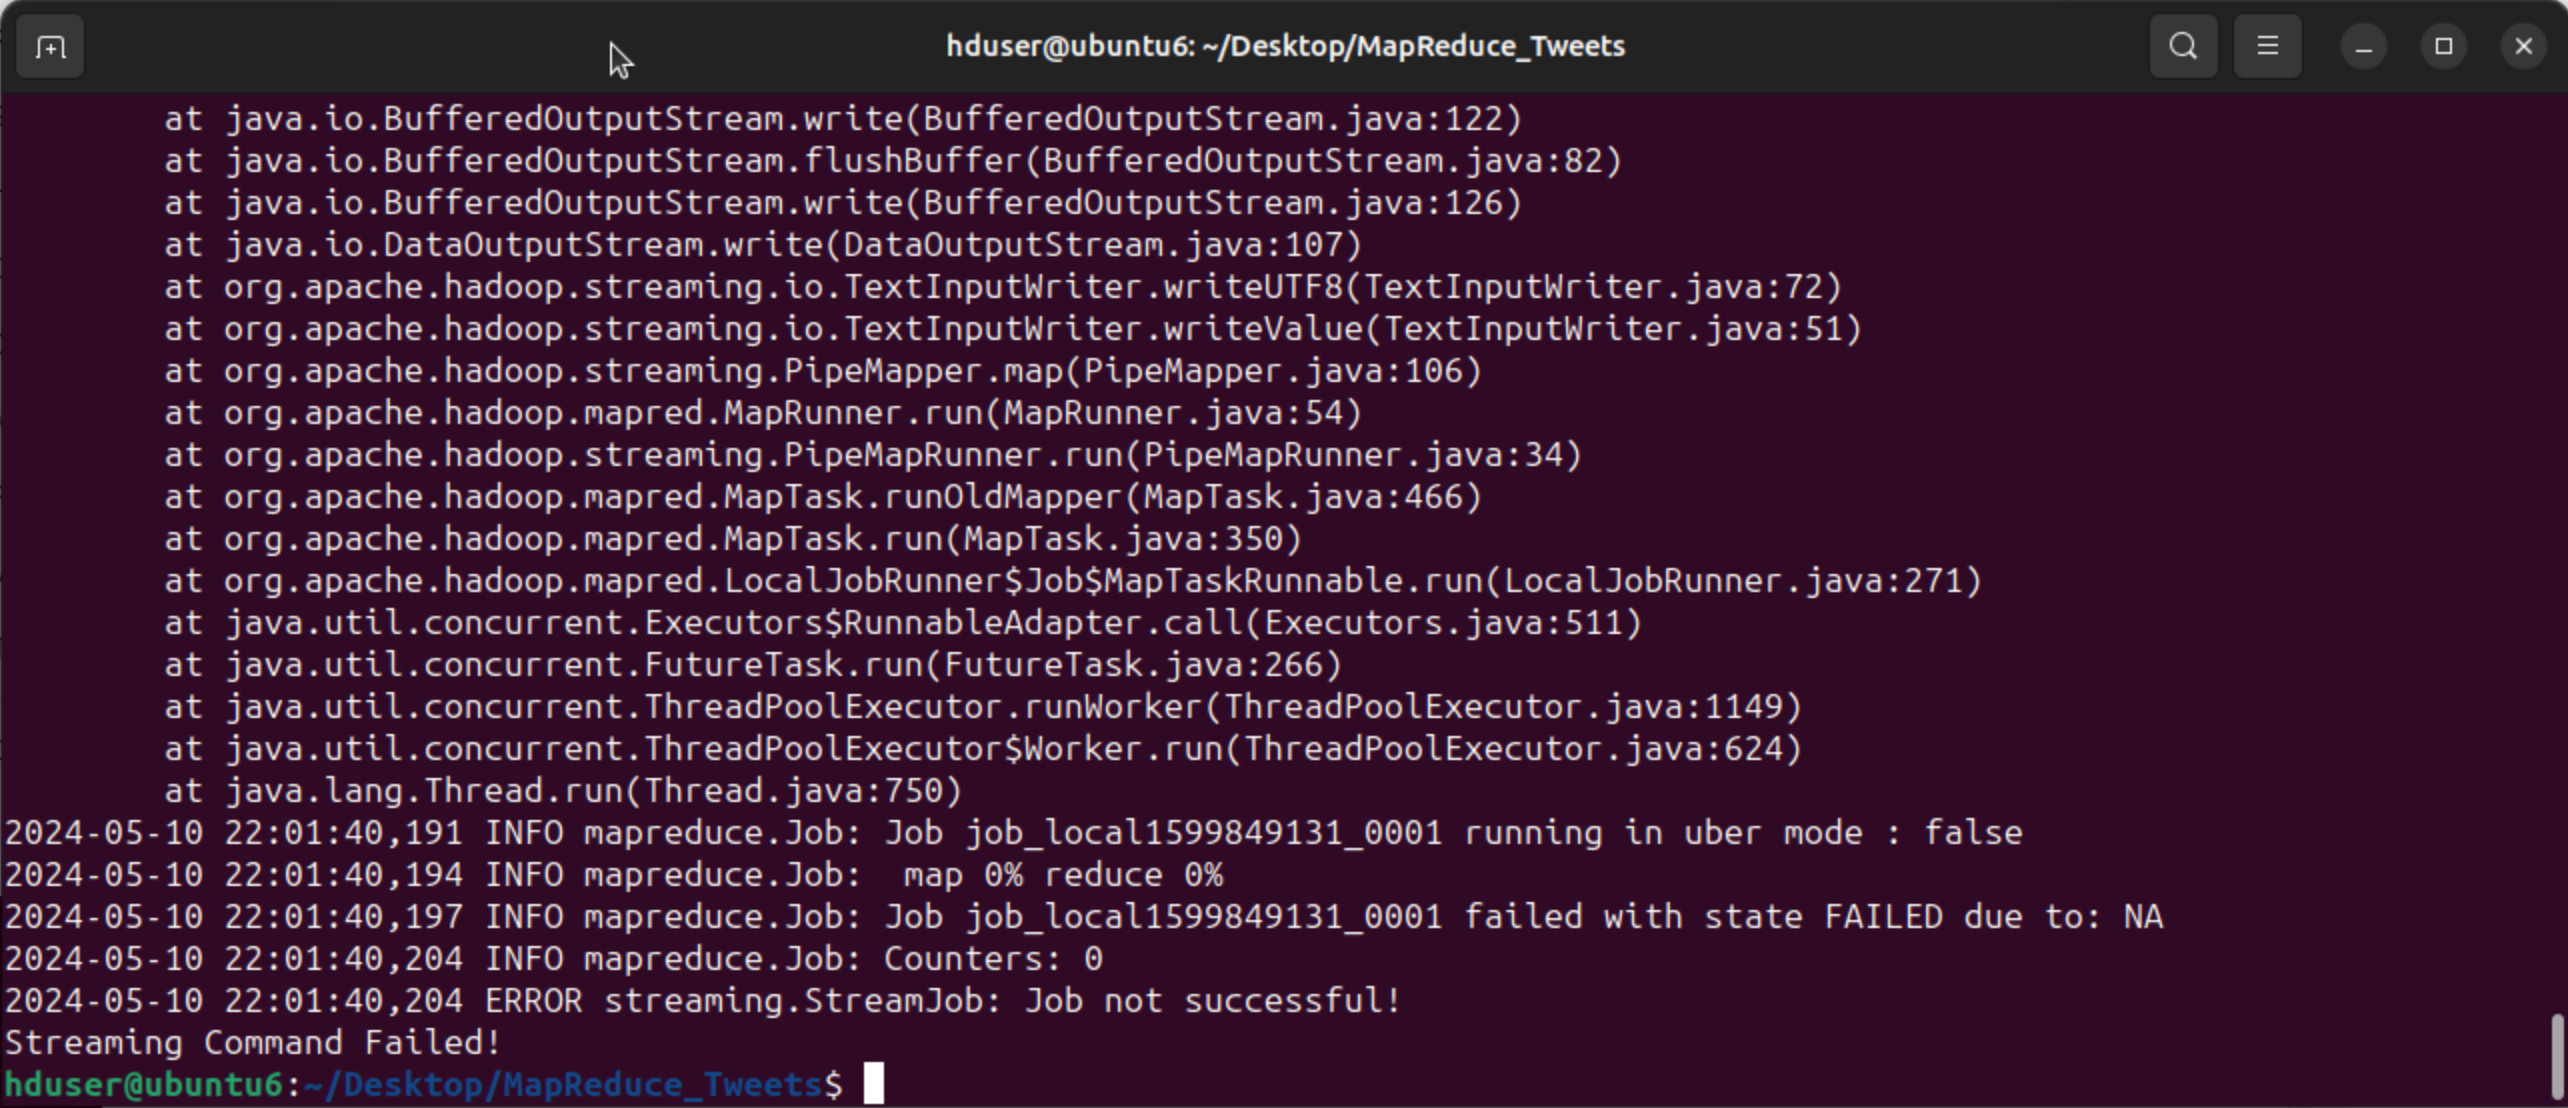

Therefore I did apply the MapReduce here in jupyter notebook and did work

## Mapper

In [4]:
# Create a map function that processes each row to produce key-value pairs.
# In this case, the key will be the sentiment label, and the value will be 1
# (indicating one occurrence of this sentiment).

def map_function(data):
    # Create a dictionary to store counts
    sentiment_counts = {}
    for sentiment in data:
        if sentiment in sentiment_counts:
            sentiment_counts[sentiment] += 1
        else:
            sentiment_counts[sentiment] = 1
    return sentiment_counts


## Reducer

In [5]:
# Defining a reduce function that aggregates all the counts from the map phase

def reduce_function(mapped_data):
    # Initialize a dictionary to hold the reduced results
    reduced_counts = {}
    for sentiment_dict in mapped_data:
        for key, value in sentiment_dict.items():
            if key in reduced_counts:
                reduced_counts[key] += value
            else:
                reduced_counts[key] = value
    return reduced_counts


## Execute MapReduce

In [6]:
# For this particular case, I am using the column vader_sentiment.
# As we can see in Part 1, Vader was more accurate when I applied the sentiment analysis compared to textblob.

mapped_data = map_function(tweets_dataset_new['vader_sentiment'])

In [7]:
# Extracting the relevant column (vader_sentiment) and apply the map function

reduced_result = reduce_function([mapped_data])

In [12]:
# Display the results of MapReduce

# print(reduced_result)
reduced_result

{'Negative': 418430, 'Positive': 747063, 'Neutral': 432822}

# MapReduce

## Last tweet and date for each unique key

### Mappper

In [ ]:
#!/usr/bin/env python3


# Last tweet and date for each unique key (which could be interpreted as a user ID or a session ID),
# the process helps in tracking when a user last tweeted.
# Helps in understanding user engagement patterns and identifying active and inactive users.
# Helps in understanding what types of content are being posted at specific times.
# Helps in further analysis to the final tweets to assess sentiment trends or shifts over time.

import sys

# Initialize variables to hold tweet data, old key for comparison, and date.
current_tweet = None
previous_key = None
current_date = None

# Process each line from standard input.

for line in sys.stdin:
    # Strip the line of leading/trailing whitespace and split by comma.
    parts = line.strip().split(",")
    
    # Ensure the line has exactly three parts: key, date, and tweet.
    if len(parts) != 3:
        
        # Skip lines that do not have exactly three parts.
        continue

    key, date, tweet = parts

    # When encountering a new key, output the previous key and its associated data.
    if previous_key and previous_key != key:
        print(f"{previous_key},{current_date},{current_tweet}")
        
        # Reset the data for the new key.
        current_tweet = tweet
        current_date = date
    else:
        # Update the tweet and date for the current key.
        current_tweet = tweet
        current_date = date

    # Update the previous key to be the current key.
    previous_key = key

# Output the last processed key's data.
if previous_key:
    print(f"{previous_key},{current_date},{current_tweet}")

### Reducer

In [ ]:
#!/usr/bin/env python3


# Last tweet and date for each unique key (which could be interpreted as a user ID or a session ID),
# the process helps in tracking when a user last tweeted.
# Helps in understanding user engagement patterns and identifying active and inactive users.
# Helps in understanding what types of content are being posted at specific times.
# Helps in further analysis to the final tweets to assess sentiment trends or shifts over time.

import sys

# Initialize variables to hold tweet data, old key for comparison, and date.
current_tweet = None
previous_key = None
current_date = None

# Process each line from standard input.

for line in sys.stdin:
    # Strip the line of leading/trailing whitespace and split by comma.
    parts = line.strip().split(",")
    
    # Ensure the line has exactly three parts: key, date, and tweet.
    if len(parts) != 3:
        
        # Skip lines that do not have exactly three parts.
        continue

    key, date, tweet = parts

    # When encountering a new key, output the previous key and its associated data.
    if previous_key and previous_key != key:
        print(f"{previous_key},{current_date},{current_tweet}")
        
        # Reset the data for the new key.
        current_tweet = tweet
        current_date = date
    else:
        # Update the tweet and date for the current key.
        current_tweet = tweet
        current_date = date

    # Update the previous key to be the current key.
    previous_key = key

# Output the last processed key's data.
if previous_key:
    print(f"{previous_key},{current_date},{current_tweet}")

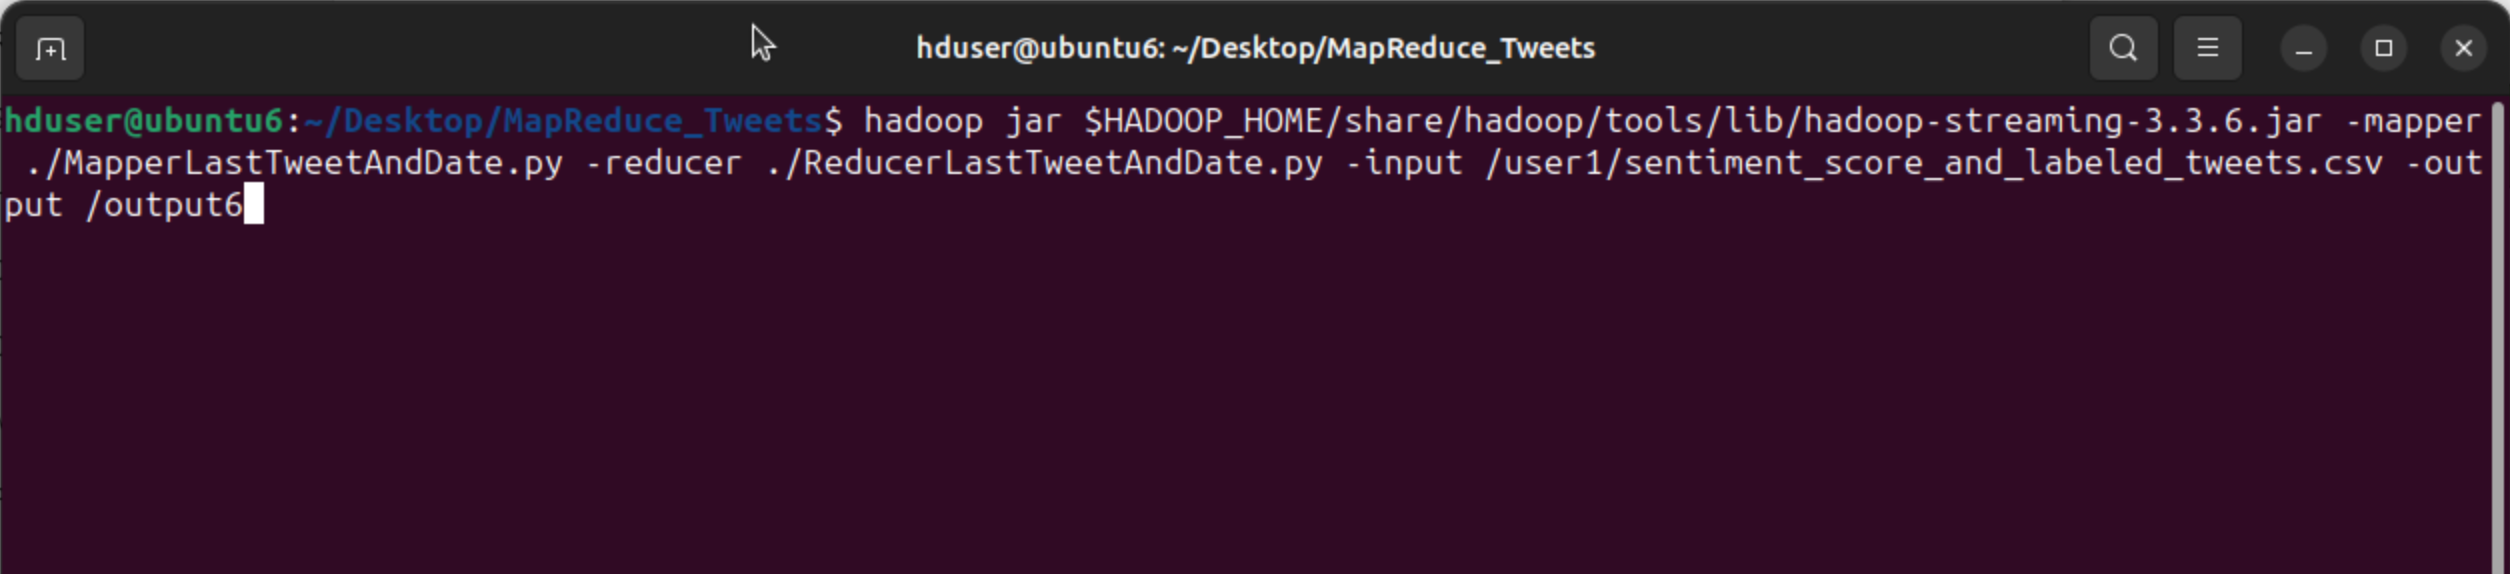

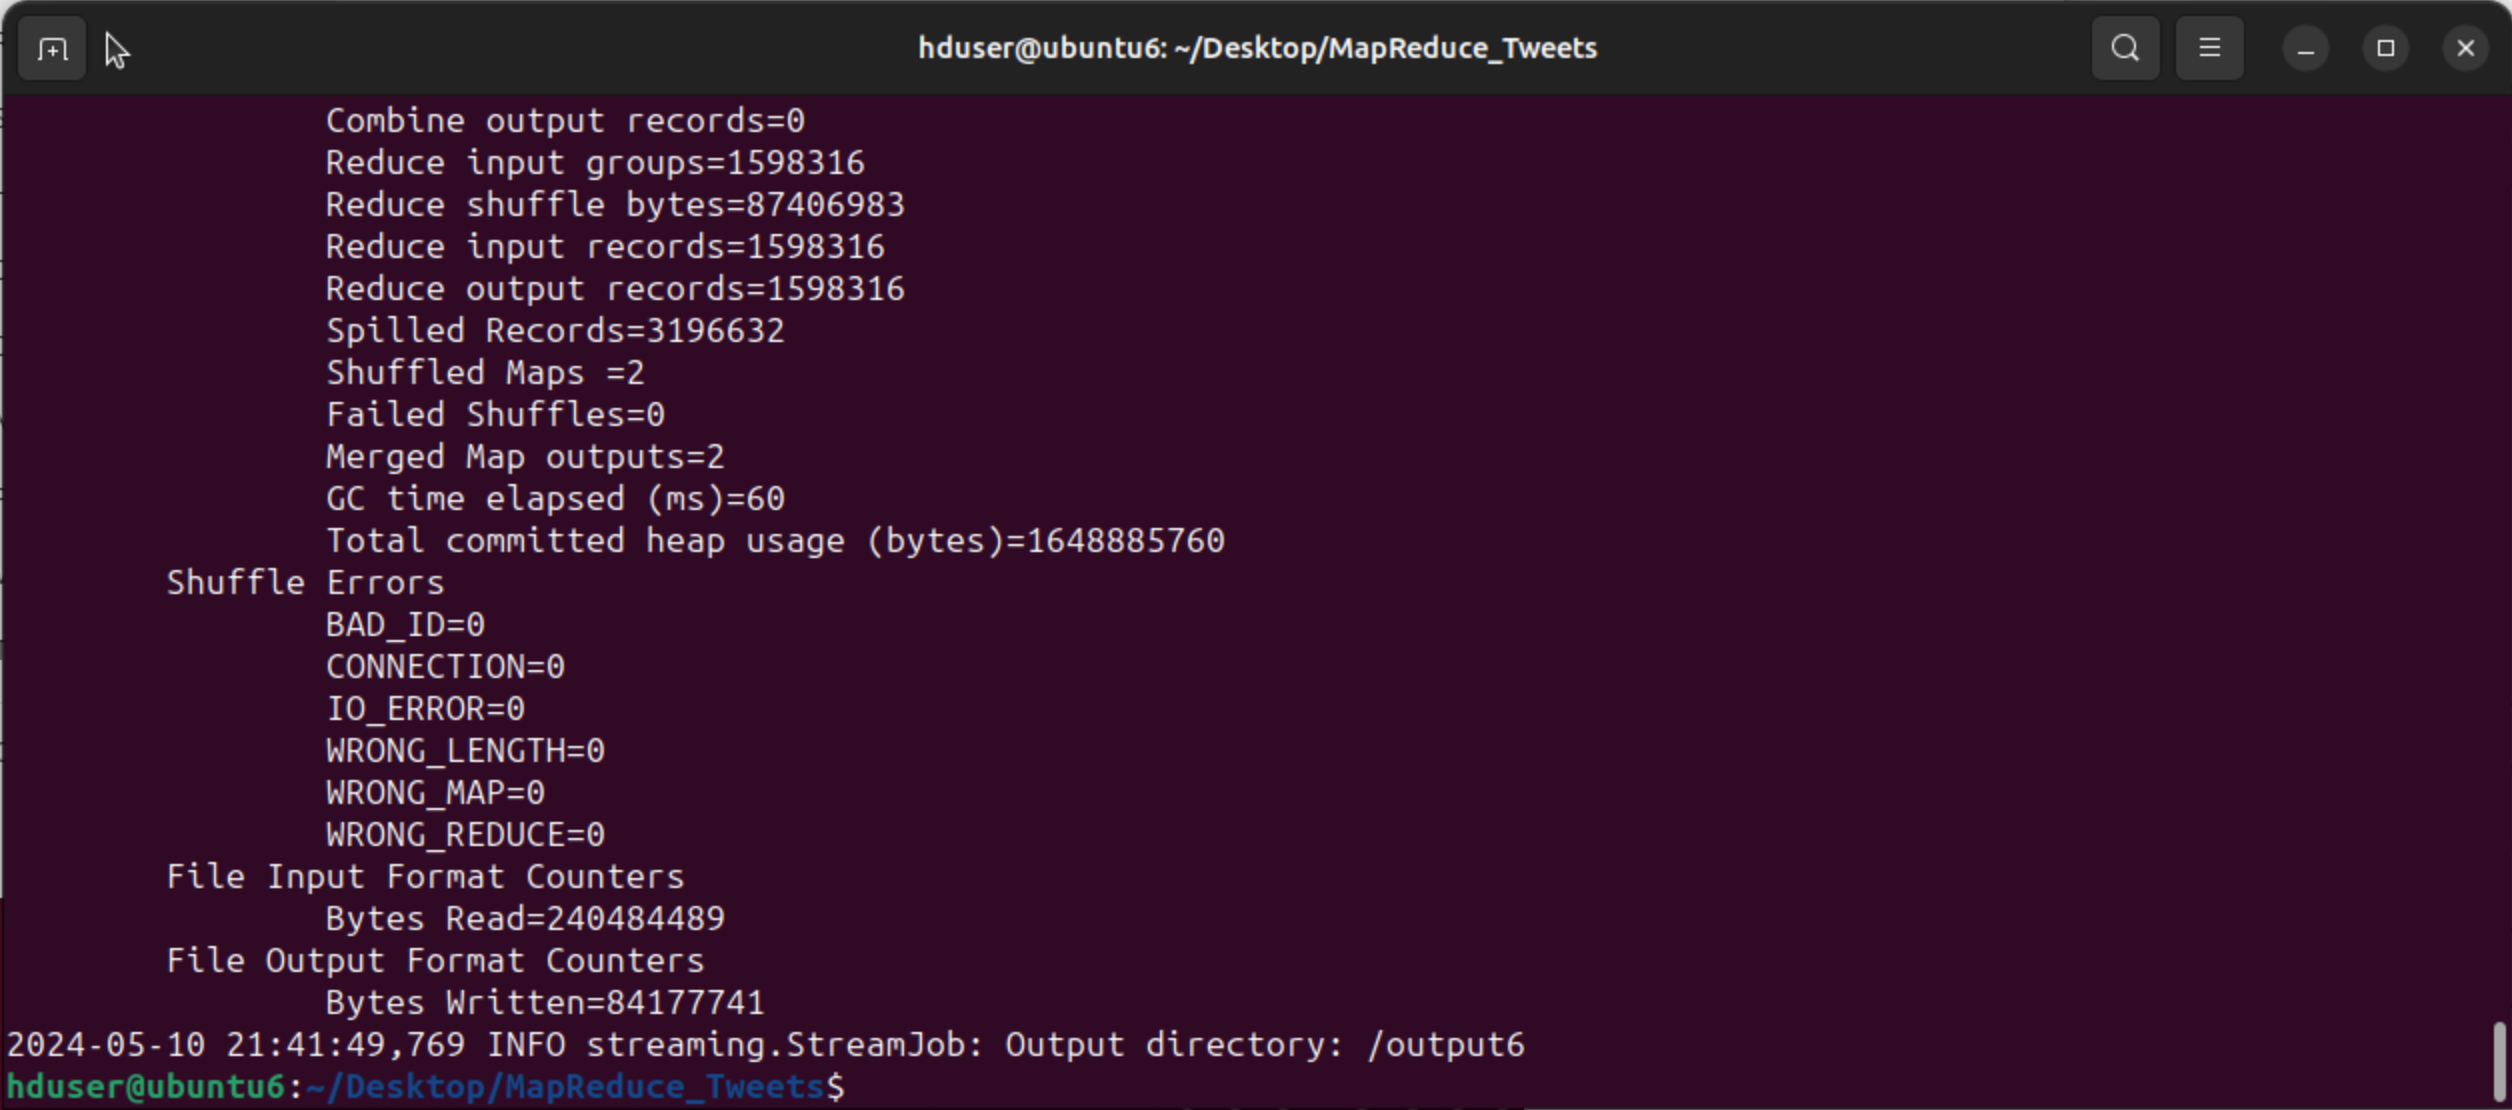

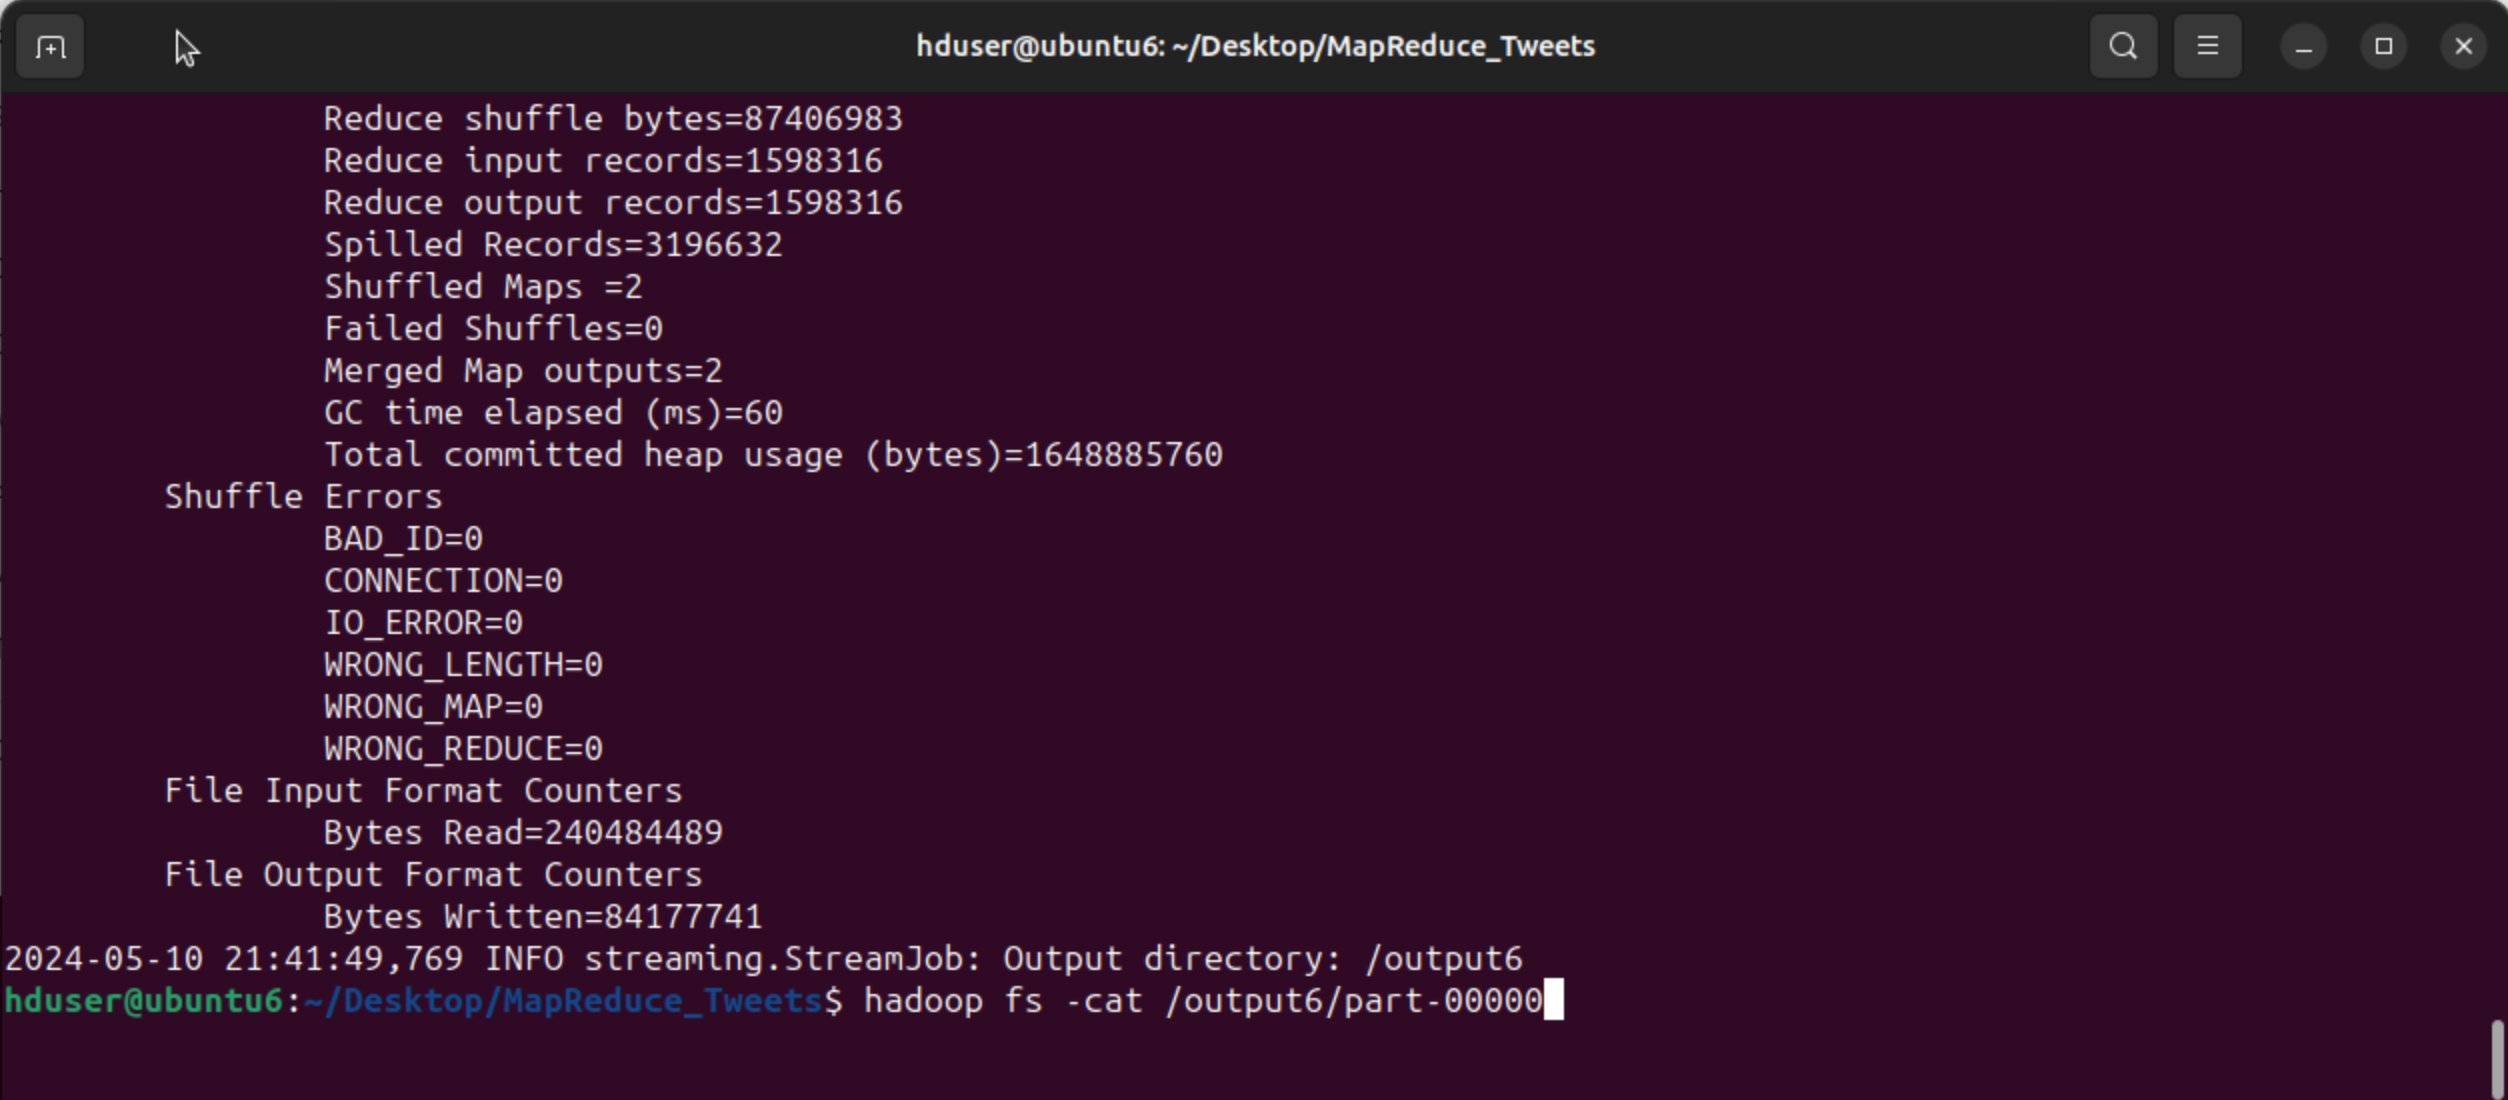

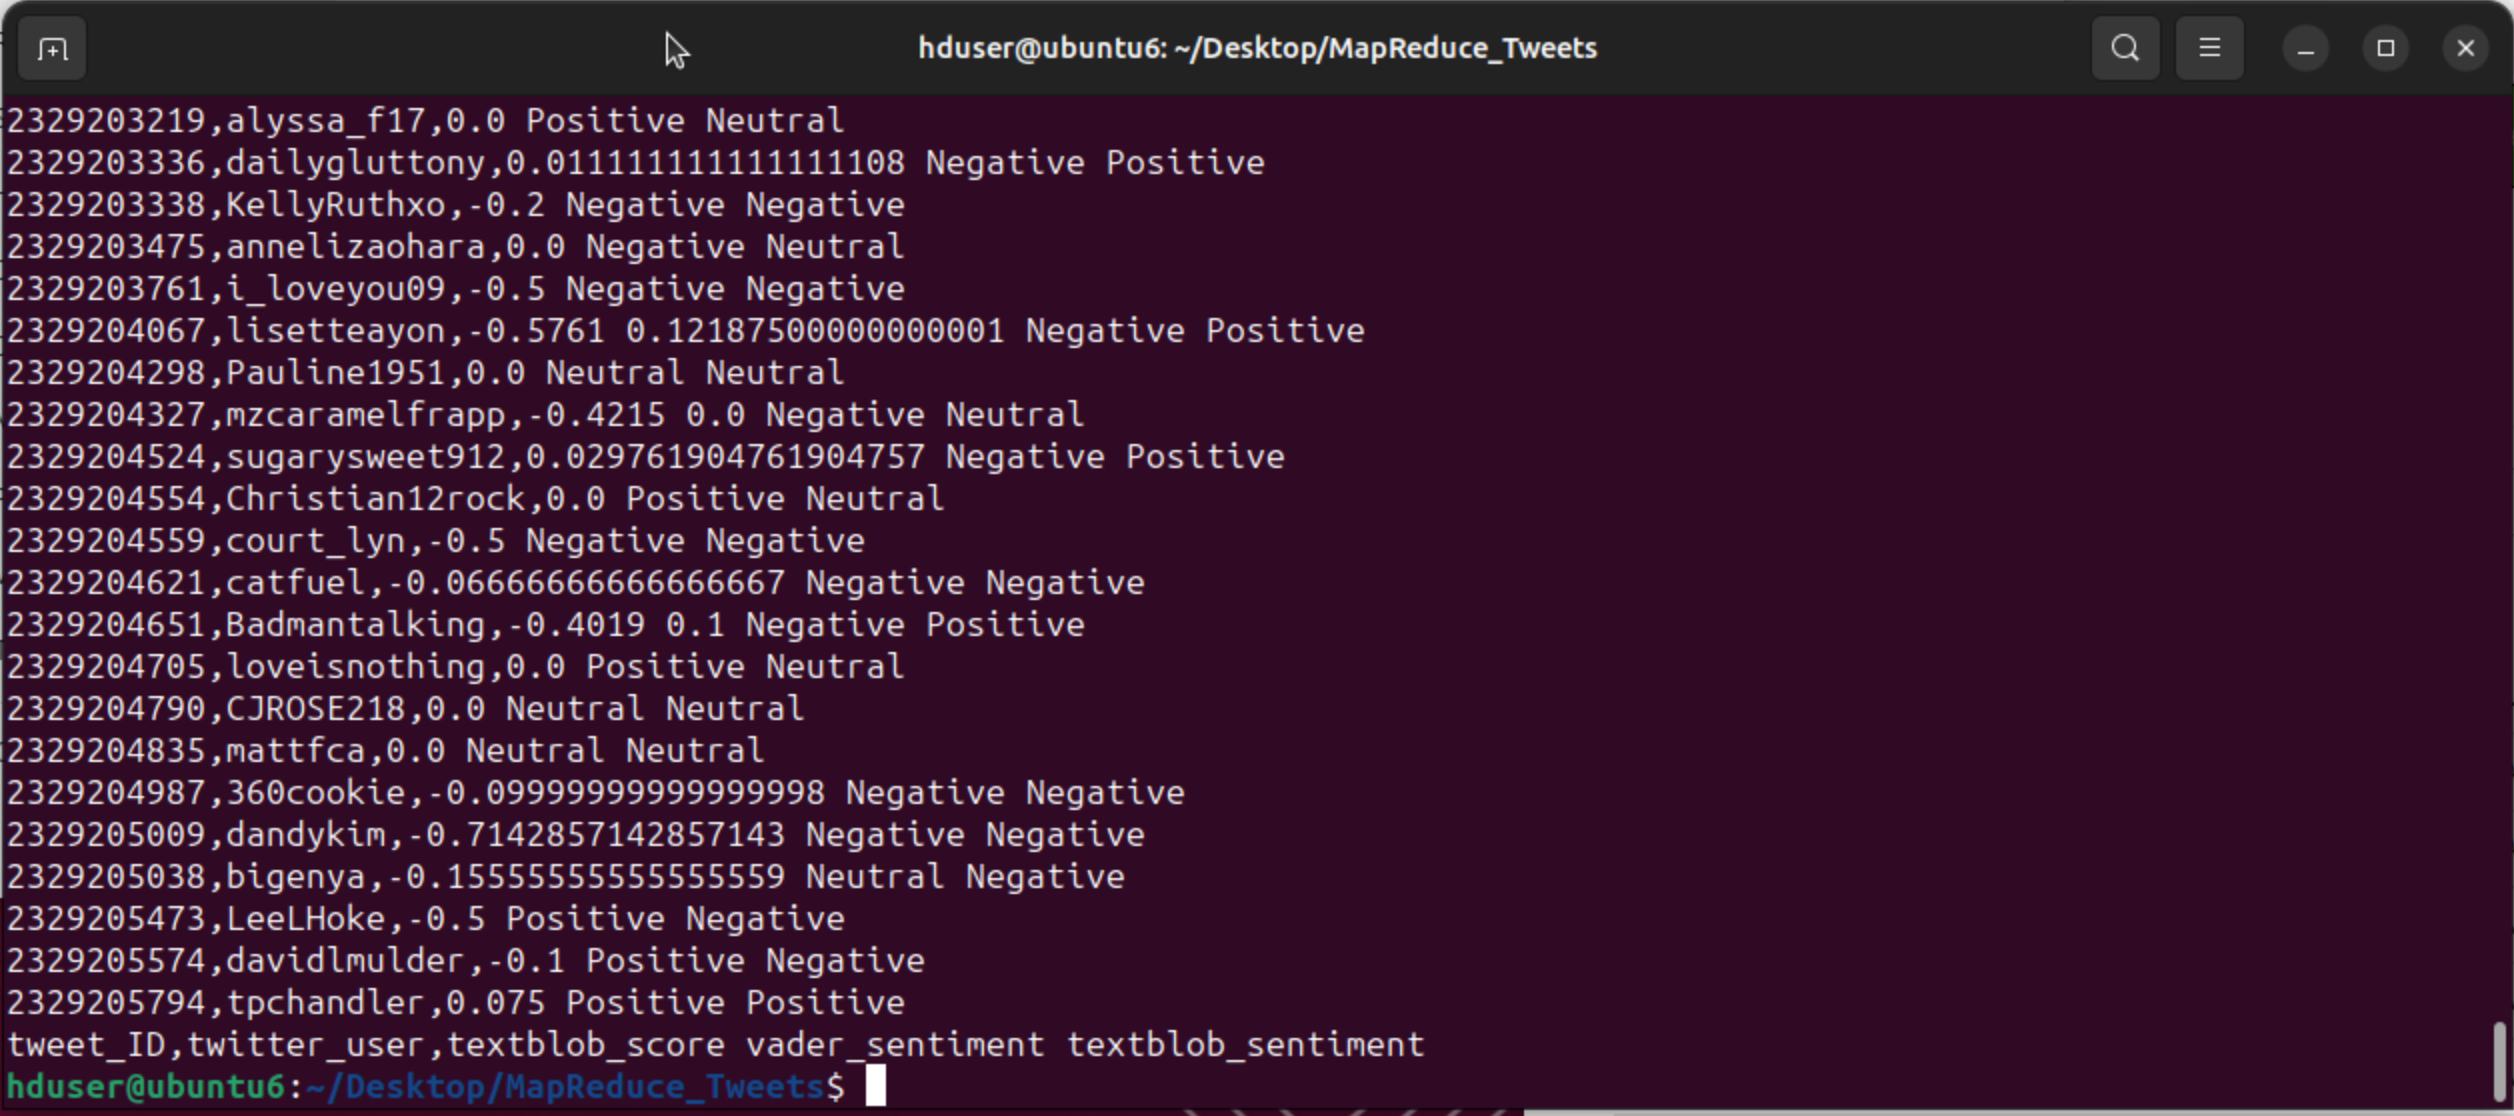

# MapReduce: Count Unique Users Posting Tweets

### Mapper

In [ ]:
#!/usr/bin/env python3

# Count Unique Users Posting Tweets
# Knowing the count of unique users posting tweets is crucial for several reasons,
# especially in contexts such as social media analysis, marketing, public opinion measurement, # and platform health monitoring.

# This provides valuable insights into user engagement levels,
# helps tailor marketing efforts, assesses content impact, informs strategic decisions,
# and aids in regulatory compliance. 

import sys

for line in sys.stdin:
    line = line.strip()
    columns = line.split(',')
    if len(columns) > 3:
        user = columns[3]
        print(f"{user}\t1")

### Reducer

In [ ]:
#!/usr/bin/env python3

# Count Unique Users Posting Tweets
# Knowing the count of unique users posting tweets is crucial for several reasons,
# especially in contexts such as social media analysis, marketing, public opinion measurement, # and platform health monitoring.

# This provides valuable insights into user engagement levels,
# helps tailor marketing efforts, assesses content impact, informs strategic decisions,
# and aids in regulatory compliance.

import sys

current_user = None
user_set = set()

for line in sys.stdin:
    line = line.strip()
    user, _ = line.split('\t', 1)

    if user not in user_set:
        user_set.add(user)

print(f'Unique Users\t{len(user_set)}')

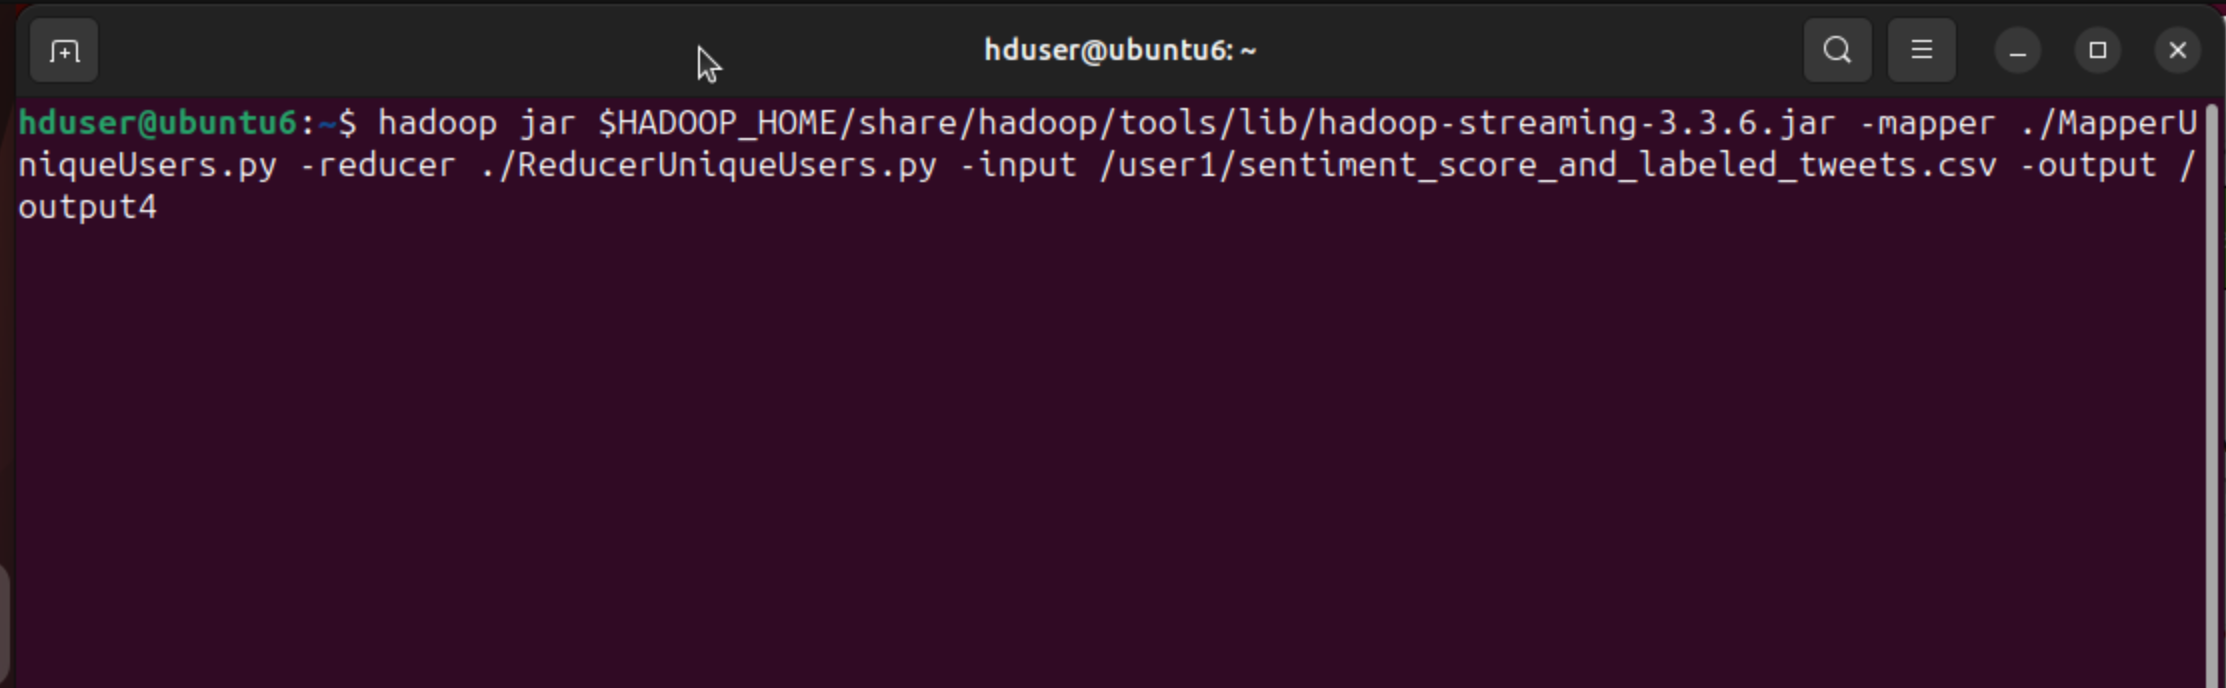

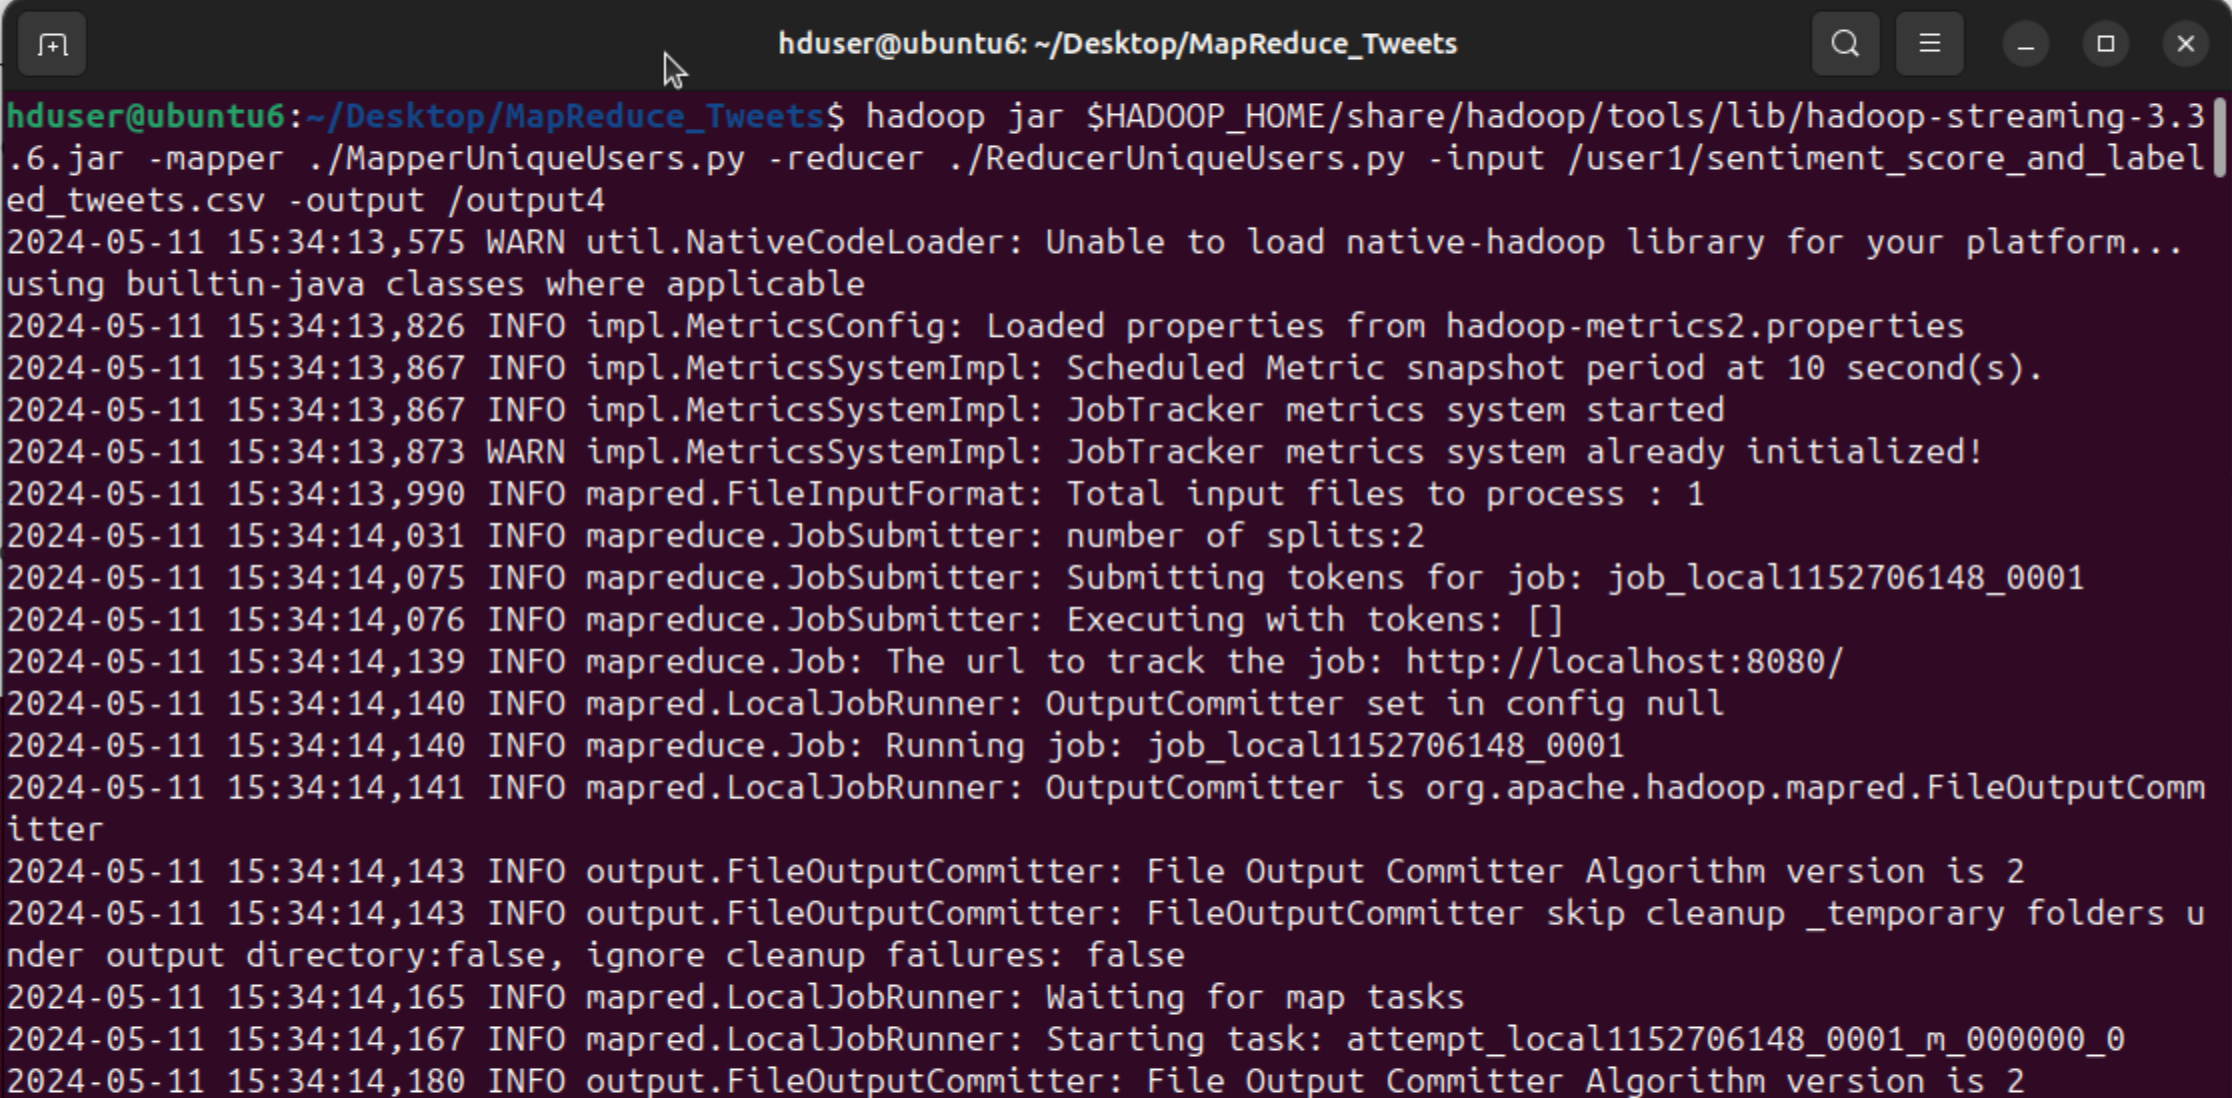

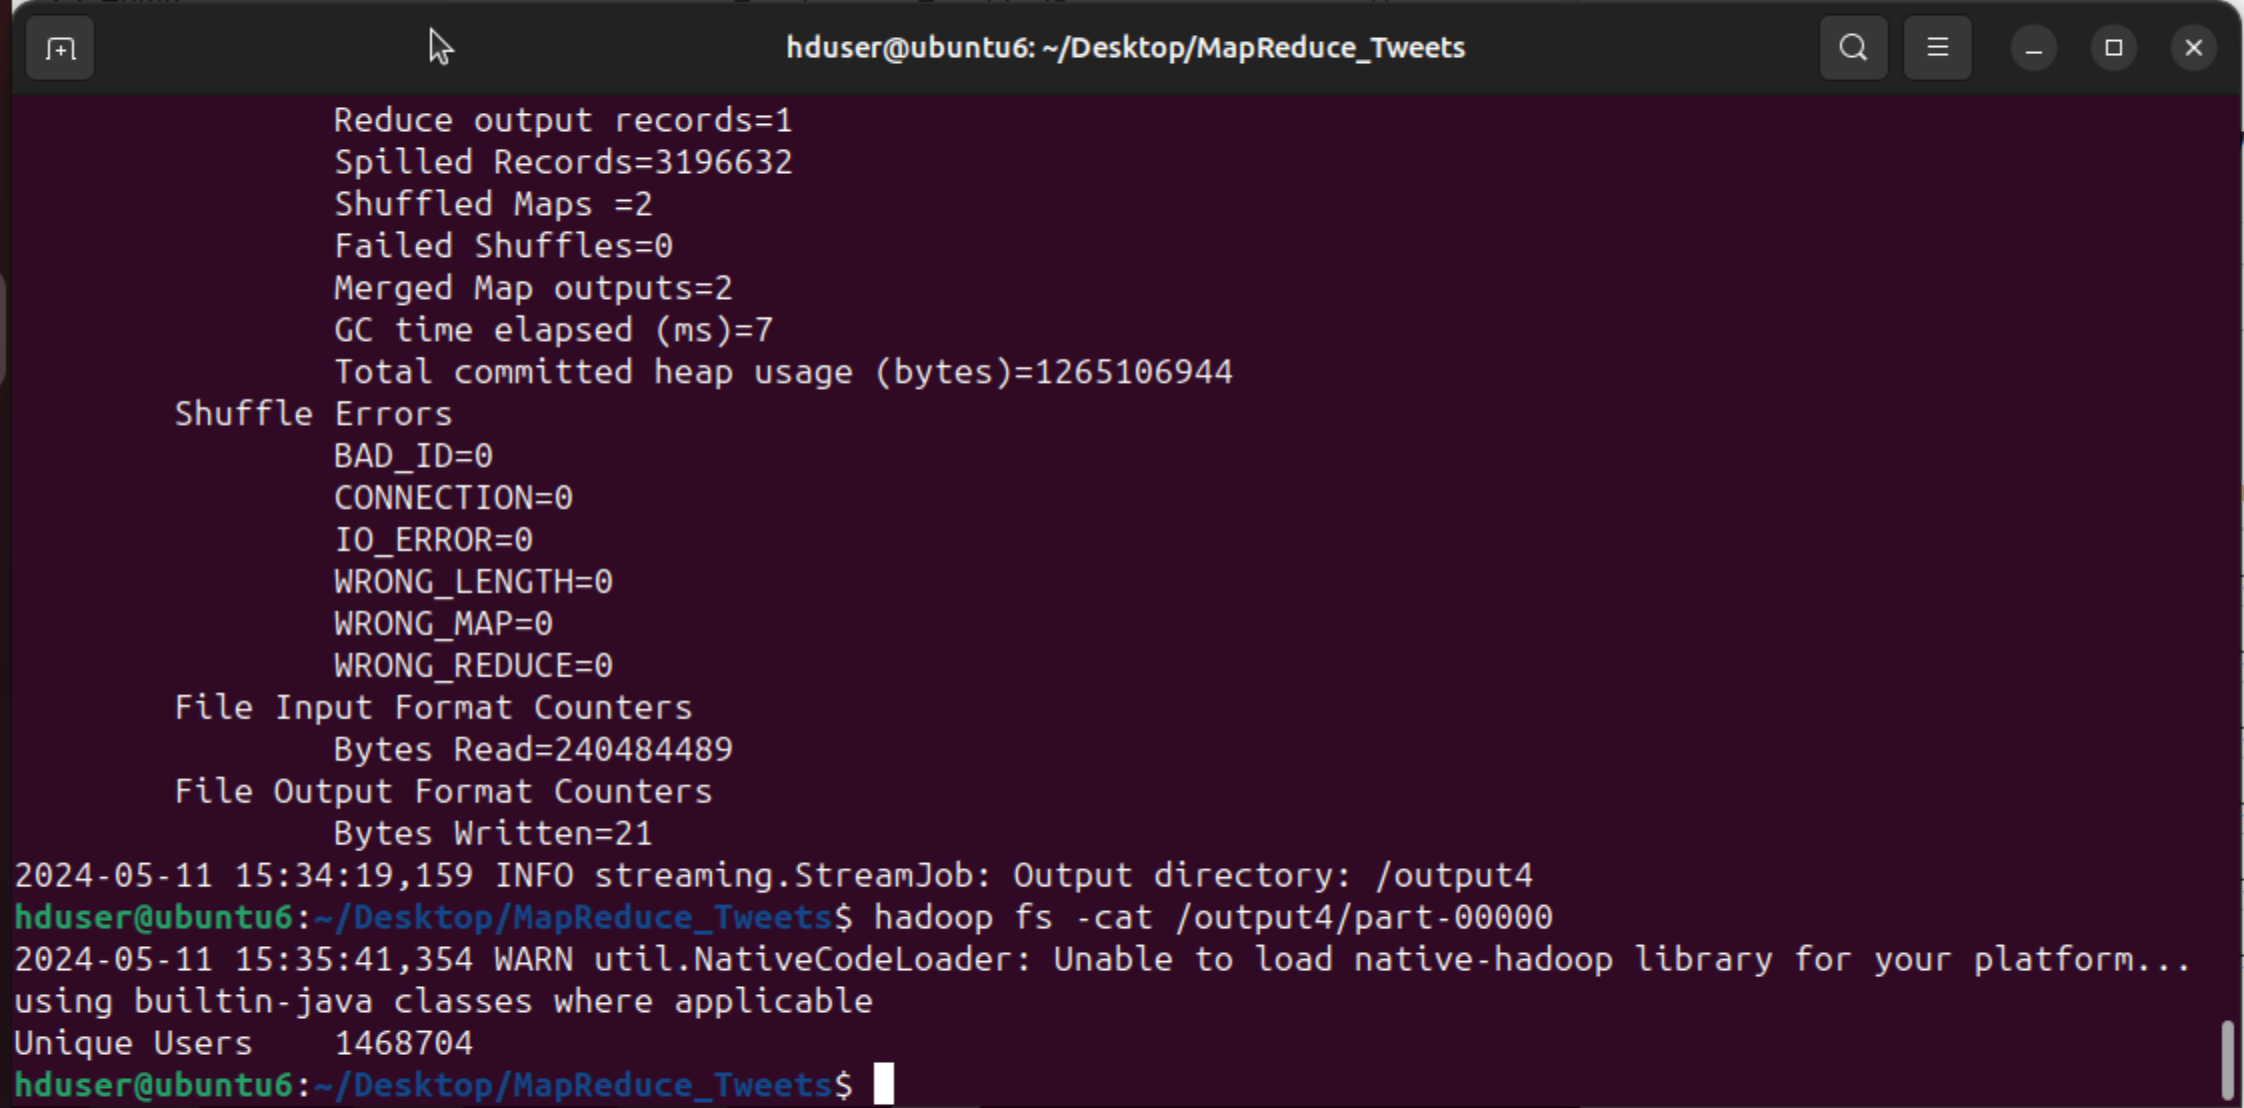